<a href="https://colab.research.google.com/github/deborahshilpi/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Background
For my final project i have taken the datasets from kaggle.com and i find that these hae some relation so i am using these datasets. Tha data sets are insurance.xlsx, Life-Expectancy-data-Updated.csv and free-zipcode-database.csv. Beeing a master's student i cam across the peoblem that many people are caused to death due to smoking in many ways so i like show the details of the data. By seeing the data people will get aware of the situations.this is a little help from my side to the public. As i am from the bachelor of dental surgen i noticed that many people come with their dental issueses caused due to smoking, this is the starting point of my peoject to choose this.

The primary objective of this project is to identify and locate people who are smoking in various states, cities, and zip codes across the country.Smoking is a significant public health concern worldwide leads to many health diseases and deaths. To make people know the issues i would like to do a model for this with my knowledge i learned.



# Datasets Used in my final project

- [Insurance ](https://www.kaggle.com/datasets/tanujdhiman/insurance) as XLSX copied from source

- [Life-Expectancy-data-Ypdated ](https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated) as CSV downloaded from source

- [free-Zipcodes-database ](https://www.kaggle.com/datasets/pavansanagapati/us-wages-via-zipcode) as CSV downloaded from source

These are the three datasets i used in my project







# Imports

In [4]:
import pandas as pd
import numpy as np
from IPython.display import IFrame
import matplotlib.pyplot as plt

# Children's Health Connections

The initial dataset involves connecting children based on their Body Mass Index (BMI), age, and smoking status.This dataset, titled insurance.xlsx from kaggle.com. Due to unavailability of the HTML files the data was manuvally uploaded in xlsx format. In this we will explore the childern health based on age.
The other dataset Life-Expectancy-Data-Updated.csv is included from 2000 - 2015 that is compared with the childrens health now i am going to connect both the datasets using some columns in the data.

In [9]:
import os
os.listdir()


insurance = pd.read_csv("insurance.csv")
insurance.head()

# display historical population df
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
insurance = insurance[0:8].drop(columns='charges')
# display population df
insurance

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
5,31,female,25.740,0,no,southeast
6,46,female,33.440,1,no,southeast
7,37,female,27.740,3,no,northwest


# Exploring deaths and population rate per year

This dataset presents the annual count of deaths recorded over a specified period. By examining the nuances of mortality rates, we aim to identify trends, variations, and potential factors influencing the health outcomes of the population.
Our analysis is to present the data by comparing both childeren and life-expectancy data. Here we drop the colums from the datset that we are not going to use. In addition to our exploration of connecting children based on BMI, age, smoking habits, and examining life expectancy trends from 2000 to 2015,This dataset encapsulates the number of deaths recorded each year. We will give the final data as per year deaths and the population.

In [12]:
import pandas as pd

le_du = pd.read_csv('/mnt/data/Life-Expectancy-Data-Updated.csv')
le_du.head()
# display original
le_du

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Life-Expectancy-Data-Updated.csv'

In [69]:
le_du = le_du[0:8].drop(columns=['Country', 'Region', 'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B','Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years','Schooling','Economy_status_Developed','Economy_status_Developing','Life_expectancy' ])
le_du

,Year,Infant_deaths,Under_five_deaths,Population_mln
0,2015,11.1,13.0,78.53
1,2015,2.7,3.3,46.44
2,2007,51.5,67.9,1183.21
3,2006,32.8,40.5,0.75
4,2012,3.4,4.3,7.91
5,2006,9.8,11.2,4.35
6,2015,6.6,8.2,144.10
7,2000,8.7,10.1,10.21


Here we are considaring the unique year data

In [70]:
unique_year = le_du.drop_duplicates(subset='Year', keep='first')
unique_year

,Year,Infant_deaths,Under_five_deaths,Population_mln
0,2015,11.1,13.0,78.53
2,2007,51.5,67.9,1183.21
3,2006,32.8,40.5,0.75
4,2012,3.4,4.3,7.91
7,2000,8.7,10.1,10.21


Now we will perform the merge operation on the data to combine them.

In [71]:
print(le_du.columns)
print(insurance.columns)
merged_df = pd.merge(le_du, insurance, left_on='Year', right_on='age', how='left')
merged_df

Index(['Year', 'Infant_deaths', 'Under_five_deaths', 'Population_mln'], dtype='object')
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


,Year,Infant_deaths,Under_five_deaths,Population_mln,age,sex,bmi,children,smoker,region
0,2015,11.1,13.0,78.53,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,2.7,3.3,46.44,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,51.5,67.9,1183.21,NaN,NaN,NaN,NaN,NaN,NaN
3,2006,32.8,40.5,0.75,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,3.4,4.3,7.91,NaN,NaN,NaN,NaN,NaN,NaN
5,2006,9.8,11.2,4.35,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,6.6,8.2,144.10,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,8.7,10.1,10.21,NaN,NaN,NaN,NaN,NaN,NaN


Here we are sorting the uniqie year data based on the years

In [72]:
average_per_year = unique_year.sort_values(by='Year')
average_per_year = average_per_year.reset_index(drop=True)

average_per_year

,Year,Infant_deaths,Under_five_deaths,Population_mln
0,2000,8.7,10.1,10.21
1,2006,32.8,40.5,0.75
2,2007,51.5,67.9,1183.21
3,2012,3.4,4.3,7.91
4,2015,11.1,13.0,78.53


performing mean of merged data.

In [73]:
average = merged_df.groupby('Year').mean()
average

<ipython-input-73-5fa274ddfcef>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average = merged_df.groupby('Year').mean()


,Infant_deaths,Under_five_deaths,Population_mln,age,bmi,children
Year,,,,,,
2000,8.7,10.100000,10.21,NaN,NaN,NaN
2006,21.3,25.850000,2.55,NaN,NaN,NaN
2007,51.5,67.900000,1183.21,NaN,NaN,NaN
2012,3.4,4.300000,7.91,NaN,NaN,NaN
2015,6.8,8.166667,89.69,NaN,NaN,NaN


#### Graph shows Number of Inant_deaths and Under_five_deaths per Year (2000-2015)
This bar graph shows the yearly counts for Inant_deaths and Under_five_deaths per Year.
The X-axis: This shows the years, ranging from 2000 to 2015.
The Y-axis: This shows the number of deaths.
Brown color shows Under_five_deaths
Orange color shows Infant_deaths
From the graph we can see that the under_five_deaths are more due to smoking or any other.

<Axes: xlabel='Year'>

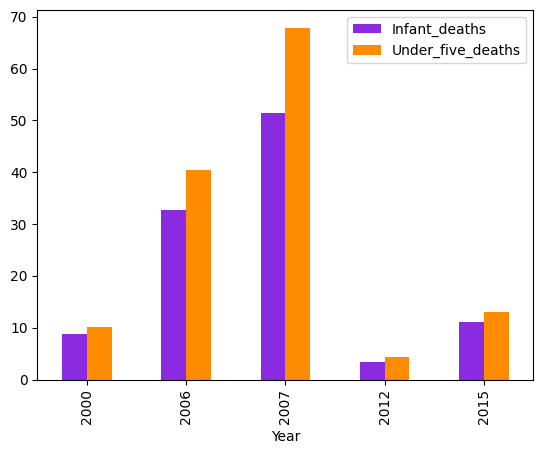

In [74]:
average_per_year.plot(x='Year', y=['Infant_deaths','Under_five_deaths'],
           kind='bar', color=['#8a2be2','#FF8C00'])

Total infant deaths and under five deaths of al the years percentage for 100 is shown below.

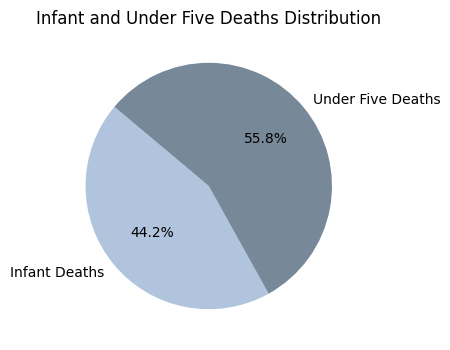

In [75]:
infant_deaths_sum = average_per_year['Infant_deaths'].sum()
under_five_deaths_sum = average_per_year['Under_five_deaths'].sum()
data = [infant_deaths_sum, under_five_deaths_sum]
labels = ['Infant Deaths', 'Under Five Deaths']
plt.figure(figsize=(8, 4))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#b0c4de', '#778899'])
plt.title('Infant and Under Five Deaths Distribution')
plt.show()

#### Graph shows the population per year
From 2000 -2015 the graph shows the population rate. We can oberve thet the population is more in between 2006 - 2008 and the population is less in 2000 and 2012.

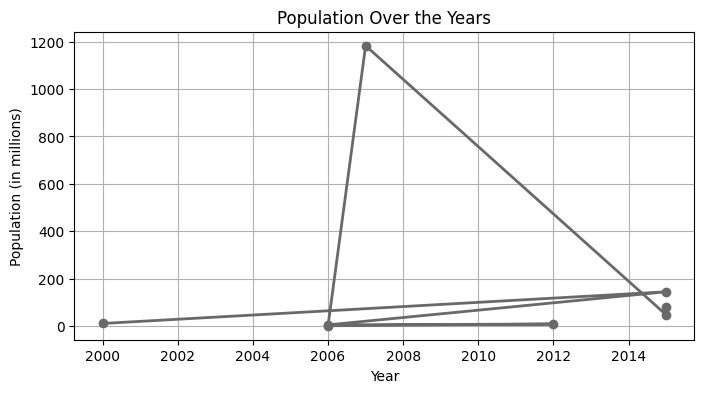

In [76]:
#le_du.plot(x='Year', y='Population_mln', color='#696969')
plt.figure(figsize=(8, 4))
plt.plot(le_du['Year'], le_du['Population_mln'], marker='o', color='#696969', linestyle='-', linewidth=2)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Population (in millions)')
plt.title('Population Over the Years')

# Display the plot
plt.grid(True)
plt.show()

Here we ara taking free-Zipcodes-database.csv to sort the people based on zipcodes as we have country in the Life-Expectancy dataset. First we perform the cleaning data on this one.
The data is displayed before and after cleaning.

In [77]:
Zip_data = pd.read_csv('free-zipcode-database.csv')

# display before cleaning
Zip_data

<ipython-input-77-efa2f2f52d5b>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  Zip_data = pd.read_csv('free-zipcode-database.csv')


,RecordNumber,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Xaxis,Yaxis,Zaxis,WorldRegion,Country,LocationText,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages,Notes
0,1,704,STANDARD,PARC PARQUE,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.30,NaN,US,"Parc Parque, PR",NA-US-PR-PARC PARQUE,False,NaN,NaN,NaN,NaN
1,2,704,STANDARD,PASEO COSTA DEL SUR,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.30,NaN,US,"Paseo Costa Del Sur, PR",NA-US-PR-PASEO COSTA DEL SUR,False,NaN,NaN,NaN,NaN
2,3,704,STANDARD,SECT LANAUSSE,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.30,NaN,US,"Sect Lanausse, PR",NA-US-PR-SECT LANAUSSE,False,NaN,NaN,NaN,NaN
3,4,704,STANDARD,URB EUGENE RICE,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.30,NaN,US,"Urb Eugene Rice, PR",NA-US-PR-URB EUGENE RICE,False,NaN,NaN,NaN,NaN
4,5,704,STANDARD,URB GONZALEZ,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.30,NaN,US,"Urb Gonzalez, PR",NA-US-PR-URB GONZALEZ,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81826,81832,10200,STANDARD,NEW YORK CITY,NY,NOT ACCEPTABLE,40.77,73.95,0.20,0.72,0.65,NaN,US,"New York City, NY",NA-US-NY-NEW YORK CITY,False,NaN,NaN,NaN,NaN
81827,81833,10200,STANDARD,NY,NY,NOT ACCEPTABLE,40.77,73.95,0.20,0.72,0.65,NaN,US,"NY, NY",NA-US-NY-NY,False,NaN,NaN,NaN,NaN
81828,81834,10200,STANDARD,NY CITY,NY,NOT ACCEPTABLE,40.77,73.95,0.20,0.72,0.65,NaN,US,"NY CITY, NY",NA-US-NY-NY CITY,False,NaN,NaN,NaN,NaN
81829,81835,10200,STANDARD,NYC,NY,NOT ACCEPTABLE,40.77,73.95,0.20,0.72,0.65,NaN,US,"NYC, NY",NA-US-NY-NYC,False,NaN,NaN,NaN,NaN


In [78]:
columns_to_uppercase = ['City', 'LocationType', 'LocationText']
for col in columns_to_uppercase:
    Zip_data[col] = Zip_data[col].str.upper()
# Here i am converting zipcode to numeric
Zip_data['Zipcode'] = pd.to_numeric(Zip_data['Zipcode'], errors='coerce')

#Replace specific values in 'City' and 'LocationText' columns
replace_values = {'City': {68: 'URB GONZALEZ'},
                  'LocationText': {108: 'Sect Lanausse, PR'}}
Zip_data.replace(replace_values, inplace=True)

# Drop unnecessary columns
columns_to_drop = ['RecordNumber', 'Xaxis', 'Yaxis', 'Zaxis', 'WorldRegion', 'Country', 'Location', 'Decommisioned', 'Notes']
Zip_data = Zip_data.drop(columns=columns_to_drop)


In [79]:
# cleaned drop box df
Zip_data

,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,LocationText,TaxReturnsFiled,EstimatedPopulation,TotalWages
0,704,STANDARD,PARC PARQUE,PR,NOT ACCEPTABLE,17.96,-66.22,"PARC PARQUE, PR",NaN,NaN,NaN
1,704,STANDARD,PASEO COSTA DEL SUR,PR,NOT ACCEPTABLE,17.96,-66.22,"PASEO COSTA DEL SUR, PR",NaN,NaN,NaN
2,704,STANDARD,SECT LANAUSSE,PR,NOT ACCEPTABLE,17.96,-66.22,"SECT LANAUSSE, PR",NaN,NaN,NaN
3,704,STANDARD,URB EUGENE RICE,PR,NOT ACCEPTABLE,17.96,-66.22,"URB EUGENE RICE, PR",NaN,NaN,NaN
4,704,STANDARD,URB GONZALEZ,PR,NOT ACCEPTABLE,17.96,-66.22,"URB GONZALEZ, PR",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
81826,10200,STANDARD,NEW YORK CITY,NY,NOT ACCEPTABLE,40.77,73.95,"NEW YORK CITY, NY",NaN,NaN,NaN
81827,10200,STANDARD,NY,NY,NOT ACCEPTABLE,40.77,73.95,"NY, NY",NaN,NaN,NaN
81828,10200,STANDARD,NY CITY,NY,NOT ACCEPTABLE,40.77,73.95,"NY CITY, NY",NaN,NaN,NaN
81829,10200,STANDARD,NYC,NY,NOT ACCEPTABLE,40.77,73.95,"NYC, NY",NaN,NaN,NaN


Here we have divided the data based on the ZipCodeType of city and state

In [81]:
zip = Zip_data.pivot_table(values='City', index='ZipCodeType', columns='State', aggfunc=np.ma.count, fill_value=0)

# display pivot table
zip

State,AA,AE,AK,AL,AP,AR,AS,AZ,CA,CO,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
ZipCodeType,,,,,,,,,,,,,,,,,,,,,
MILITARY,45,432,0,0,177,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PO BOX,0,0,297,240,0,217,1,301,1161,264,...,214,885,170,342,20,94,236,165,284,68
STANDARD,0,0,103,1028,0,1084,0,595,2848,1057,...,913,3463,668,1469,9,802,1195,1241,1041,250
UNIQUE,0,0,2,182,0,31,0,31,421,138,...,120,291,60,283,0,22,83,88,20,8


Taking only 10 states in considaration.

In [82]:
zip = zip.iloc[:5, :10]
zip

State,AA,AE,AK,AL,AP,AR,AS,AZ,CA,CO
ZipCodeType,,,,,,,,,,
MILITARY,45,432,0,0,177,0,0,0,0,0
PO BOX,0,0,297,240,0,217,1,301,1161,264
STANDARD,0,0,103,1028,0,1084,0,595,2848,1057
UNIQUE,0,0,2,182,0,31,0,31,421,138


### Graph
This graph shows how many zip code types are there in each state. There are four zip code types are there and for each state how many type in each is show in the graph.
From graph we can observe that the state CA has the heighest zip code types than any other state

Text(0, 0.5, 'Number of Zipcode type for each state')

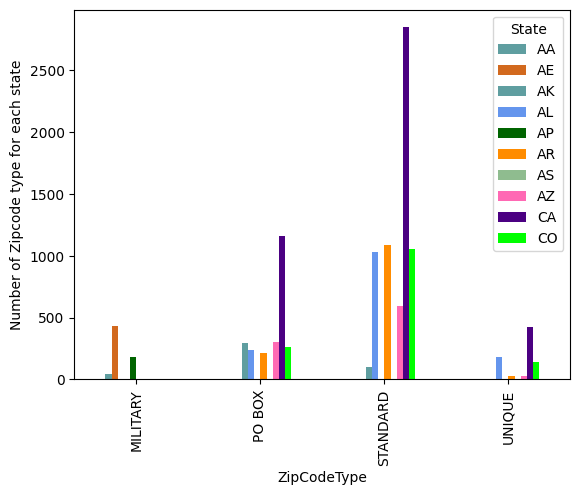

In [83]:
zip.plot(kind='bar', color=['#5f9ea0', '#d2691e', '#5f9ea0', '#6495ed', '#006400', '#ff8c00', '#8fbc8f', '#ff69b4', '#4b0082', '#00ff00']).set_ylabel('Number of Zipcode type for each state')

Here i am combining the population from life expextancy dataset and city from the free zipcode dataset and display the data.

In [62]:
data_1 = average['Population_mln']
data_2 = Zip_data['City']
labels = ['Population_mln', 'City']

com_data = pd.concat([data_1, data_2], axis=1, keys=labels)
com_data

,Population_mln,City
2000,10.21,URB SANTA MARIA
2006,2.55,SALINAS
2007,1183.21,BO COCO NUEVO
2012,7.91,BRISAS DE EVELYMAR
2015,89.69,EXT MONSERRATE
...,...,...
81826,NaN,NEW YORK CITY
81827,NaN,NY
81828,NaN,NY CITY
81829,NaN,NYC


In [63]:
com_data = com_data[0:5]
com_data

,Population_mln,City
2000,10.21,URB SANTA MARIA
2006,2.55,SALINAS
2007,1183.21,BO COCO NUEVO
2012,7.91,BRISAS DE EVELYMAR
2015,89.69,EXT MONSERRATE


Graph shows the population_mln on x-axis and city on y-axis

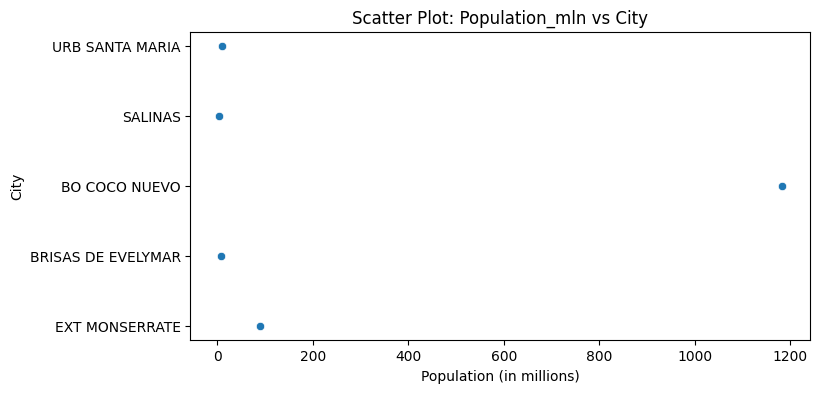

In [64]:
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.scatterplot(data=com_data, x='Population_mln', y='City')
plt.title('Scatter Plot: Population_mln vs City')
plt.xlabel('Population (in millions)')
plt.ylabel('City')
plt.show()